In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from random import random
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from matplotlib import pyplot

In [ ]:
#Importing the libraries 
import pandas as pd

In [ ]:
df = pd.read_csv('/content/telco_churn (1).csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing the datasetr
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/telco_churn.csv")

In [ ]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Score,CLTV,Churn Reason,Churn Value
0,3668-QPYBK,1.0,United States,California,Los Angeles,90003.0,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,86.0,3239.0,Competitor made better offer,1.0
1,9237-HQITU,1.0,United States,California,Los Angeles,90005.0,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,67.0,2701.0,Moved,1.0
2,9305-CDSKC,1.0,United States,California,Los Angeles,90006.0,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,86.0,5372.0,Moved,1.0
3,7892-POOKP,1.0,United States,California,Los Angeles,90010.0,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,84.0,5003.0,Moved,1.0
4,0280-XJGEX,1.0,United States,California,Los Angeles,90015.0,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,89.0,5340.0,Competitor had better devices,1.0


In [ ]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Score,CLTV,Churn Value
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,58.699418,4400.295755,0.265370
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,21.525131,1183.057152,0.441561
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,5.000000,2003.000000,0.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,40.000000,3469.000000,0.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,61.000000,4527.000000,0.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,75.000000,5380.500000,1.000000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,100.000000,6500.000000,1.000000


In [ ]:
# Find null values in the dataset
df.isnull().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
7039     True
7040     True
7041     True
7042     True
7043     True
Length: 7044, dtype: bool

In [ ]:
# Find null values in the dataset
df.dropna(axis = 1, how ='any', thresh = None, subset = None, inplace=False)
df.dropna(axis = 0, how ='any', thresh = None, subset = None, inplace=False)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Score,CLTV,Churn Reason,Churn Value
0,3668-QPYBK,1.0,United States,California,Los Angeles,90003.0,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,86.0,3239.0,Competitor made better offer,1.0
1,9237-HQITU,1.0,United States,California,Los Angeles,90005.0,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,67.0,2701.0,Moved,1.0
2,9305-CDSKC,1.0,United States,California,Los Angeles,90006.0,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,86.0,5372.0,Moved,1.0
3,7892-POOKP,1.0,United States,California,Los Angeles,90010.0,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,84.0,5003.0,Moved,1.0
4,0280-XJGEX,1.0,United States,California,Los Angeles,90015.0,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,89.0,5340.0,Competitor had better devices,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,1699-HPSBG,1.0,United States,California,Palm Springs,92264.0,"33.745746, -116.514215",33.745746,-116.514215,Male,...,One year,Yes,Electronic check,59.80,727.8,Yes,69.0,4581.0,Competitor offered higher download speeds,1.0
1865,8775-CEBBJ,1.0,United States,California,Seeley,92273.0,"32.790282, -115.689559",32.790282,-115.689559,Female,...,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes,87.0,2029.0,Competitor offered higher download speeds,1.0
1866,6894-LFHLY,1.0,United States,California,Vidal,92280.0,"34.264124, -114.717964",34.264124,-114.717964,Male,...,Month-to-month,Yes,Electronic check,75.75,75.75,Yes,97.0,5571.0,Competitor offered higher download speeds,1.0
1867,0639-TSIQW,1.0,United States,California,White Water,92282.0,"33.972293, -116.654195",33.972293,-116.654195,Female,...,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes,70.0,5620.0,Competitor offered more data,1.0


In [ ]:
# Find null values in the dataset
df.isnull().any(axis=0)

CustomerID           True
Count                True
Country              True
State                True
City                 True
Zip Code             True
Lat Long             True
Latitude             True
Longitude            True
Gender               True
Senior Citizen       True
Partner              True
Dependents           True
Tenure Months        True
Phone Service        True
Multiple Lines       True
Internet Service     True
Online Security      True
Online Backup        True
Device Protection    True
Tech Support         True
Streaming TV         True
Streaming Movies     True
Contract             True
Paperless Billing    True
Payment Method       True
Monthly Charges      True
Total Charges        True
Churn Label          True
Churn Score          True
CLTV                 True
Churn Reason         True
Churn Value          True
dtype: bool

# **Analyzing the categorical features**

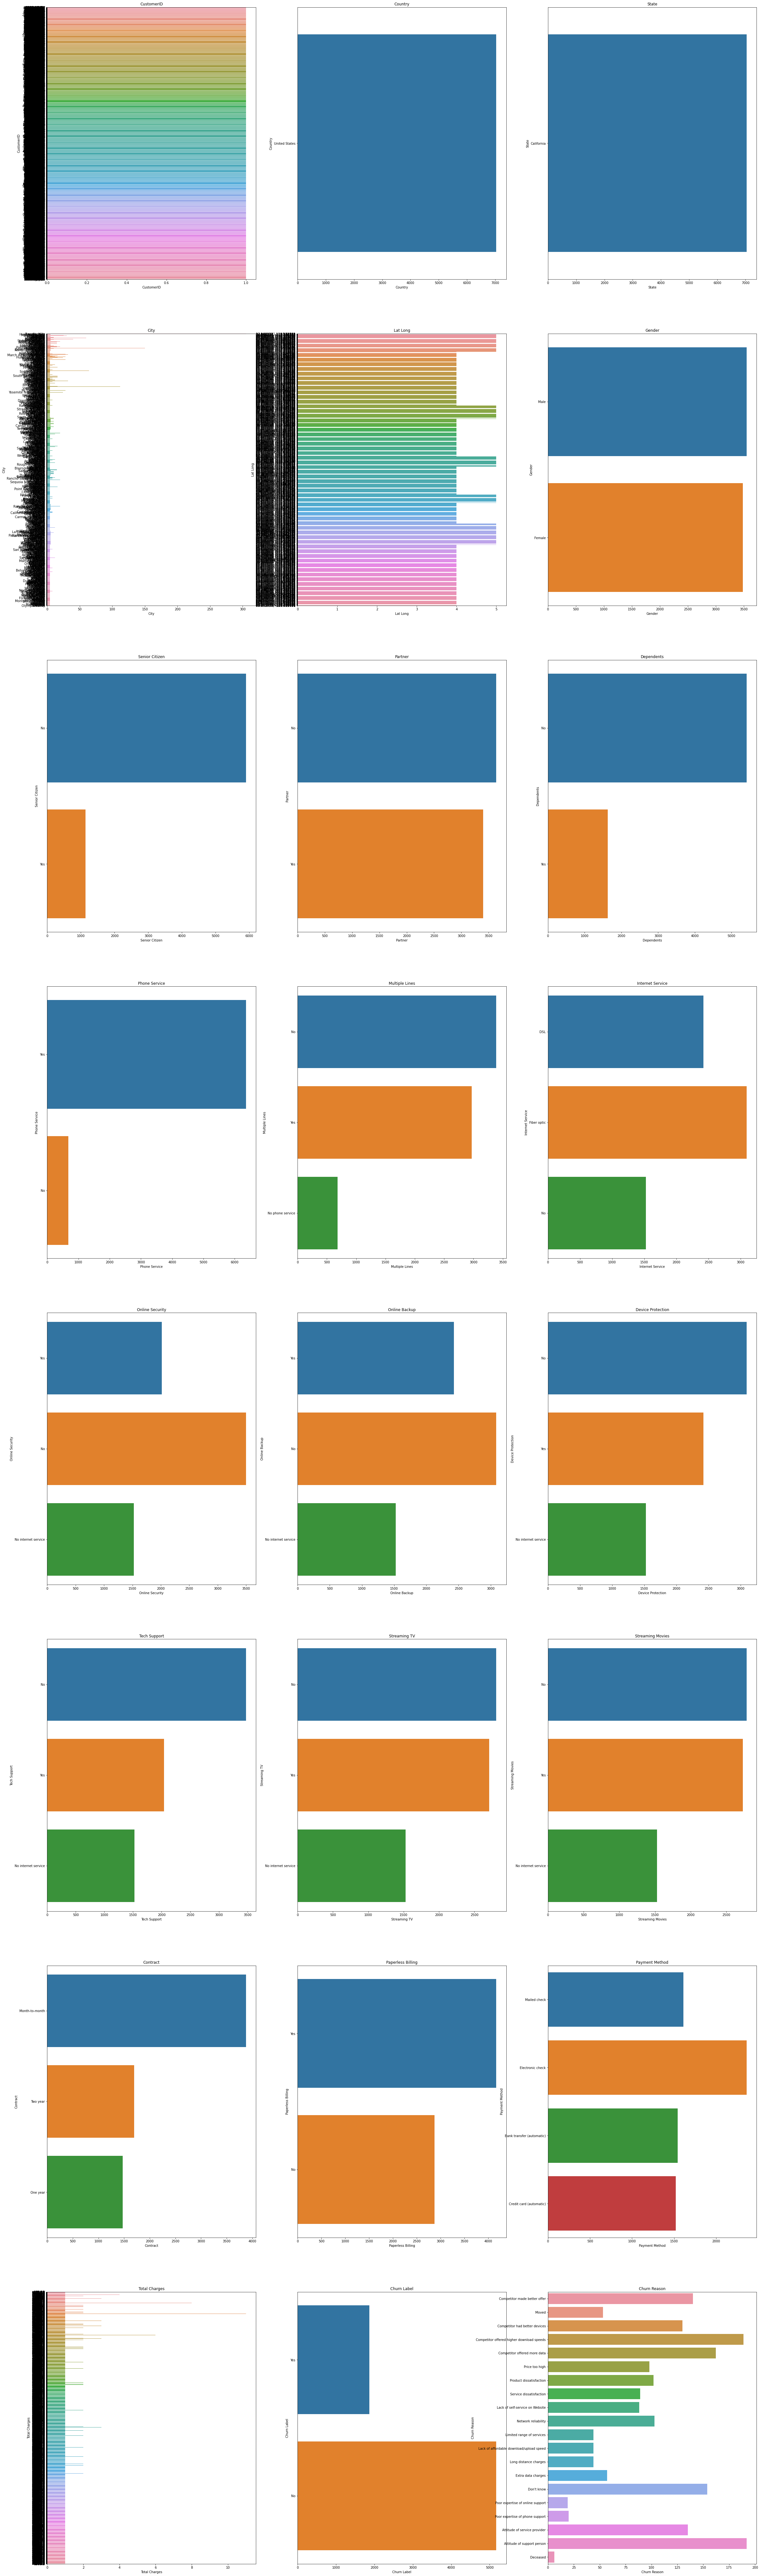

In [ ]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') )]
plt.figure(figsize=(40,280), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(15,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

# Findings



In [ ]:
df['Churn Value'].value_counts()

0.0    5174
1.0    1869
Name: Churn Value, dtype: int64

In [ ]:
df[df['Churn Value'] == 0.0].sample(1869)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Score,CLTV,Churn Reason,Churn Value
5015,8818-DOPVL,1.0,United States,California,El Cerrito,94530.0,"37.924838, -122.289145",37.924838,-122.289145,Female,...,Month-to-month,Yes,Electronic check,104.45,4863.85,No,76.0,4103.0,NaN,0.0
6774,2346-CZYIL,1.0,United States,California,Beverly Hills,90211.0,"34.063947, -118.383001",34.063947,-118.383001,Male,...,Two year,No,Credit card (automatic),20.35,531.6,No,52.0,4962.0,NaN,0.0
3234,7369-TRPFD,1.0,United States,California,Chatsworth,91311.0,"34.294142, -118.603883",34.294142,-118.603883,Male,...,One year,No,Mailed check,18.80,279.2,No,43.0,2916.0,NaN,0.0
3263,8069-YQQAJ,1.0,United States,California,Studio City,91604.0,"34.139082, -118.39275",34.139082,-118.392750,Male,...,Month-to-month,Yes,Mailed check,31.10,419.7,No,55.0,3448.0,NaN,0.0
6214,0082-LDZUE,1.0,United States,California,Calistoga,94515.0,"38.629618, -122.593216",38.629618,-122.593216,Male,...,Month-to-month,Yes,Mailed check,44.30,44.3,No,57.0,4427.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4154,2410-CIYFZ,1.0,United States,California,Woodland,95776.0,"38.694081, -121.694431",38.694081,-121.694431,Male,...,Month-to-month,No,Mailed check,20.40,42.9,No,77.0,3000.0,NaN,0.0
5680,6135-OZQVA,1.0,United States,California,Santa Clarita,91350.0,"34.502432, -118.41459",34.502432,-118.414590,Female,...,Month-to-month,Yes,Electronic check,53.65,404.35,No,51.0,4389.0,NaN,0.0
6503,7356-IWLFW,1.0,United States,California,Weott,95571.0,"40.310119, -123.909449",40.310119,-123.909449,Male,...,Month-to-month,Yes,Bank transfer (automatic),80.00,3769.7,No,51.0,3315.0,NaN,0.0
5155,7821-DPRQE,1.0,United States,California,Stockton,95207.0,"38.002125, -121.324979",38.002125,-121.324979,Male,...,Month-to-month,Yes,Electronic check,107.70,7320.9,No,53.0,5015.0,NaN,0.0


<h3>Correlation matrix</h3>

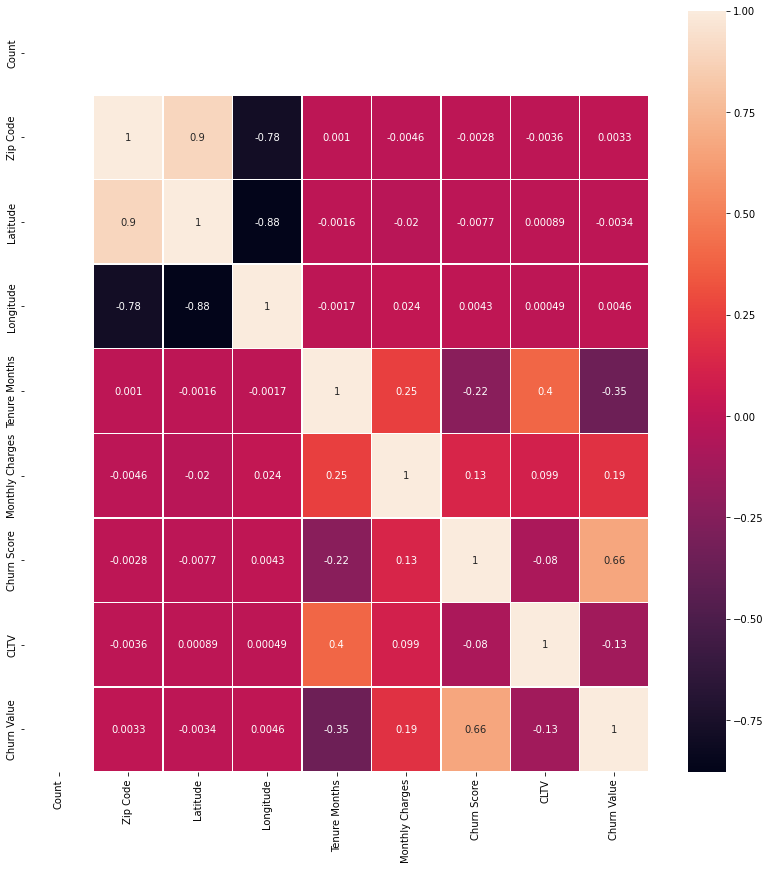

In [ ]:
fig, ax = plt.subplots(figsize=(20,20)
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

Outcome of Correlation Matrix



# Check the Data set is balanced or not based on target values in classification

**Integer encoding**

In [ ]:
#Identify the categorical columns in the dataset
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

In [ ]:
#Encoding the categorical values ( Integer encoding )
new_df = df.apply(LabelEncoder().fit_transform)
new_df.head()

In [ ]:
#Randomization of the dataset
np.random.seed(1000)

In [ ]:
# Seperating the Features and Target Columns 
df_feat = new_df[new_df.columns[0:-1]] # Feature columns 
df_head = new_df[new_df.columns[len(new_df.columns)-1]]  # Target variable 

## Data Normalization

In [ ]:
# Feature Scalling using Sklearn StandardScaler function
scaler = StandardScaler()
StandardScaler(copy=True,with_mean=True,with_std=True)
scaler.fit(df_feat)
scaled_features = scaler.transform(df_feat)
df_scaled = pd.DataFrame(scaled_features,columns=df_feat.columns)
df_scaled.head()

In [ ]:
df_scaled.dtypes

## Feature Importance Analysis

In [ ]:
##Feature Selection using XGBClassifier
model = XGBClassifier()
# fit the model
model.fit(df_scaled,df_head)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()